*Francisco del Val Yagüe*


## Histograma de los puntos de los visitantes

__OBJETIVO:__ 

Replicar la función histogram de los rdd, esta nos ofrece una lista de tuplas formadas por los cortes de las columnas y las frecuencias de cada columna.

Realizo un mapeo sobre el rdd liga_parsed y me quedo con los puntos de los equipos visitantes.


En primer lugar se ha de inicializar el contexto spark.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #descomprime el fichero
!pip install -q findspark #instala spark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark #para trabajar con spark
findspark.init()
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() 


Ahora cargamos el archivo propiamente dicho:

In [ ]:
data= "partidosLigaNBA.csv"
nba = sc.textFile(data)  

In [ ]:
nba.count() #count es funcion de accion: nos devuelve datos

12908

In [ ]:
nba.take(5) # quitamos la cabecera del fichero

['Date:Start..ET.:Visitor.Neutral:PTS:Home.Neutral:PTS.1',
 'Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74']

In [ ]:
#¿cómo quitar la cabecera con spark?
head_nba = nba.take(1)[0] #damos un valor a take(1)[0]
wh_nba = nba.filter(lambda x: x != head_nba) #creamos un filtro con lambda para eliminar la cabecera
wh_nba.take(5) #hasta que no se haga la funcion take de accion, no se ejecuta lambda de arriba

['Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74',
 'Wed, Oct 31, 2007:"8:30 pm":Seattle SuperSonics:103:Denver Nuggets:120']


Aplicamos map para separar los elementos en una lista para poder trabajar con ellos:


In [ ]:
wh_nba = nba.filter(lambda x: x != head_nba).map(lambda x: x.split(":")) 
wh_nba.take(5) #hasta que no hacemos take,  no se ejecuta el lambda de arriba

[['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Utah Jazz',
  '117',
  'Golden State Warriors',
  '96'],
 ['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Houston Rockets',
  '95',
  'Los Angeles Lakers',
  '93'],
 ['Tue, Oct 30, 2007',
  '"7',
  '00 pm"',
  'Portland Trail Blazers',
  '97',
  'San Antonio Spurs',
  '106'],
 ['Wed, Oct 31, 2007',
  '"8',
  '00 pm"',
  'Dallas Mavericks',
  '92',
  'Cleveland Cavaliers',
  '74'],
 ['Wed, Oct 31, 2007',
  '"8',
  '30 pm"',
  'Seattle SuperSonics',
  '103',
  'Denver Nuggets',
  '120']]

Cogemo el ultimo elemento de la lista:

In [ ]:
wh_nba = nba.filter(lambda x: x != head_nba).map(lambda x: x.split(":")[-1]) 
wh_nba.take(5) 

['96', '93', '106', '74', '120']

Pasamos los numeros en formato string a enteros:

In [ ]:
wh_nba = nba.filter(lambda s: s != head_nba) \
                      .map(lambda s: s.split(":")[-1]) \
                      .filter(lambda s_pvisit: s_pvisit.isdigit()) \
                      .map(lambda d_pvisit: int(d_pvisit)) 

wh_nba.take(1500) 

[96,
 93,
 106,
 74,
 120,
 119,
 101,
 112,
 104,
 102,
 106,
 80,
 99,
 95,
 101,
 103,
 102,
 85,
 110,
 87,
 120,
 91,
 69,
 113,
 92,
 98,
 96,
 123,
 89,
 111,
 78,
 88,
 133,
 82,
 88,
 92,
 115,
 119,
 88,
 97,
 103,
 95,
 107,
 83,
 91,
 104,
 89,
 104,
 112,
 103,
 87,
 119,
 104,
 105,
 119,
 89,
 94,
 93,
 88,
 98,
 96,
 103,
 97,
 115,
 87,
 106,
 96,
 103,
 104,
 107,
 101,
 85,
 102,
 103,
 110,
 91,
 101,
 92,
 71,
 106,
 101,
 96,
 91,
 100,
 118,
 90,
 82,
 95,
 72,
 72,
 113,
 103,
 122,
 82,
 117,
 91,
 99,
 86,
 105,
 103,
 113,
 102,
 107,
 117,
 91,
 116,
 110,
 104,
 90,
 84,
 95,
 102,
 108,
 95,
 88,
 103,
 105,
 112,
 123,
 92,
 99,
 122,
 103,
 118,
 89,
 70,
 92,
 123,
 90,
 110,
 100,
 108,
 115,
 105,
 117,
 73,
 105,
 82,
 87,
 109,
 106,
 104,
 105,
 100,
 101,
 125,
 88,
 102,
 83,
 107,
 105,
 112,
 114,
 82,
 98,
 116,
 105,
 111,
 98,
 94,
 101,
 89,
 79,
 110,
 86,
 93,
 127,
 101,
 128,
 107,
 99,
 83,
 111,
 98,
 105,
 113,
 87,
 101,
 93,
 99,
 

In [ ]:
(wh_nba.max() - wh_nba.min()) / 10

10.9

In [ ]:
wh_nba.min()

59

In [ ]:
wh_nba.max()

168

In [ ]:
def inter(x):
  if x<69.9:
    return 'int 1'
  elif x <80.8:
    return 'int 2'
  elif x<91.7:
    return 'int 3'
  elif x<102.6:
    return 'int 4'
  elif x<113.5:
    return 'int 5'
  elif x<124.4:
    return 'int 6'
  elif x<135.3:
    return 'int 7'
  elif x<146.2:
    return 'int 8'
  elif x<157.1:
    return 'int 9'
  elif x<=168:
    return 'int 10'

In [ ]:
inter(160)

'int 10'

In [ ]:
type(wh_nba)

pyspark.rdd.PipelinedRDD

In [ ]:
wh_nba_inter = nba.filter(lambda s: s != head_nba) \
                      .map(lambda s: s.split(":")[-1]) \
                      .filter(lambda s_pvisit: s_pvisit.isdigit()) \
                      .map(lambda d_pvisit: int(d_pvisit)) \
                      .map(lambda x : (inter(x),1)) \
                      .reduceByKey(lambda a, b: a + b) \
                      .collect()

#wh_nba_data_inter.take(1500)

In [ ]:
wh_nba_inter

[('int 4', 4287),
 ('int 2', 439),
 ('int 6', 1717),
 ('int 8', 59),
 ('int 10', 1),
 ('int 9', 5),
 ('int 5', 3832),
 ('int 3', 2125),
 ('int 1', 37),
 ('int 7', 395)]

In [ ]:
type(wh_nba_inter)

list

In [ ]:
import pandas as pd
df_wh_nba_inter = pd.DataFrame(wh_nba_inter)

In [ ]:
type(df_wh_nba_inter)

pandas.core.frame.DataFrame

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7f4c1c88c710>,
 <a list of 10 Text major ticklabel objects>)

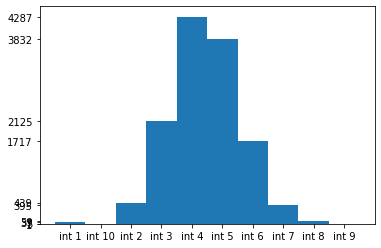

In [ ]:
labels, ys = zip(*wh_nba_inter)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) 
plt.yticks(ys)